In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import cufflinks as cf
import plotly

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline(connected=True)

In [7]:
plt.style.use('seaborn-v0_8-dark')

# Get the Data

In [8]:
df = pd.read_csv('KNN_Project_Data')

In [9]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# Performing EDA

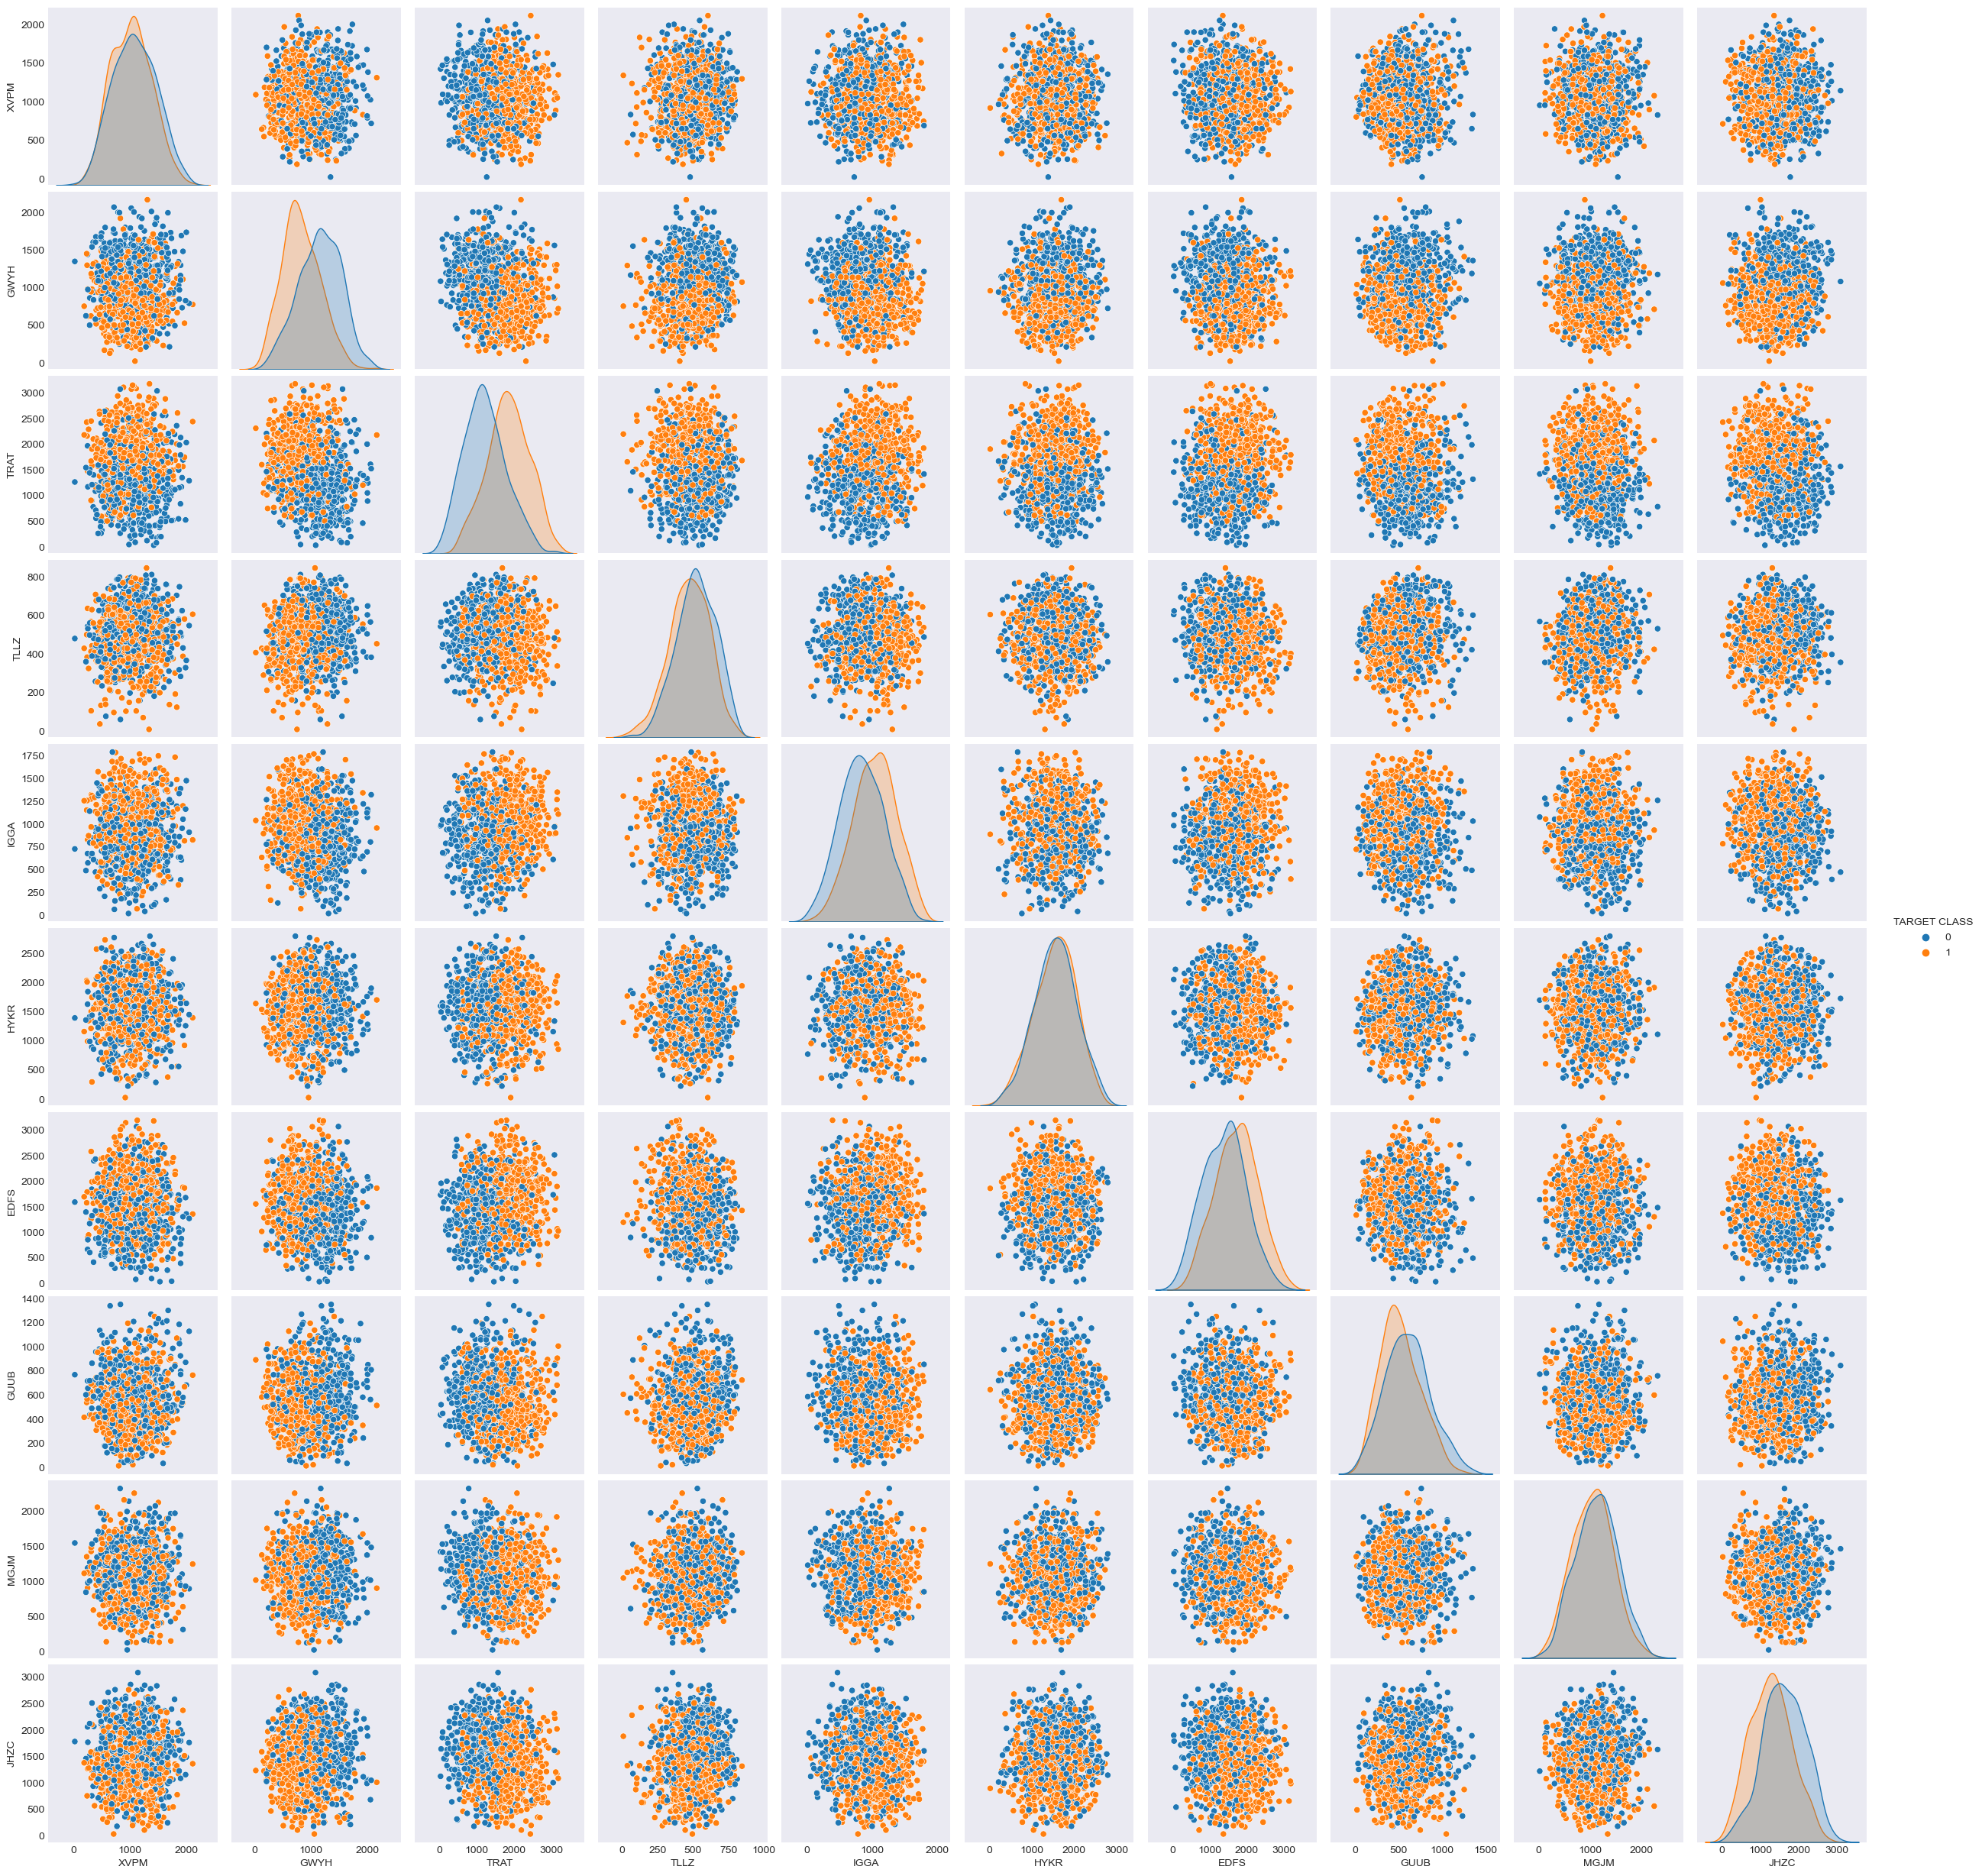

In [11]:
sns.pairplot(df, hue='TARGET CLASS');

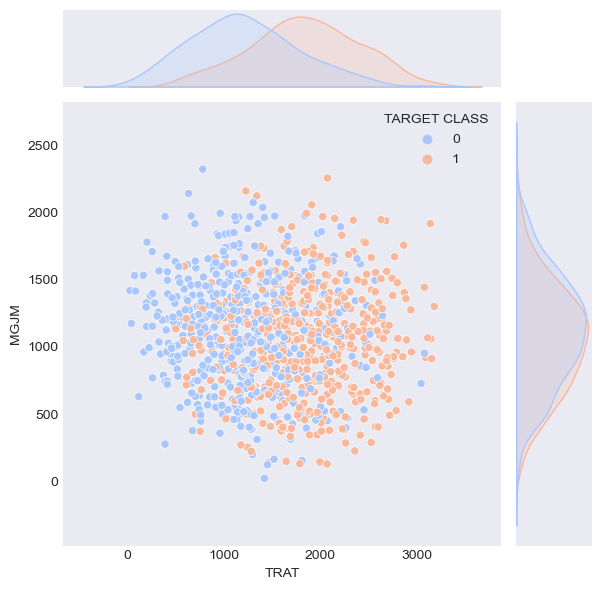

In [19]:
sns.jointplot(x='TRAT', y='MGJM', data=df,palette='coolwarm', color='orange', hue='TARGET CLASS');

# Standardize the Variables

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

### Fit scaler to the features

In [22]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [23]:
df_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

### Convert the df_feature to Data frame

In [26]:
df_feature = pd.DataFrame(df_feature, columns=df.columns[: - 1])

In [27]:
df_feature.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

###  Split the Data

In [28]:
X = df_feature

y = df['TARGET CLASS']

In [32]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        98
           1       0.76      0.76      0.76       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



[[74 24]
 [24 78]]


# Choosing a K Value
By using elbow method

In [33]:
error_rate = []

for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

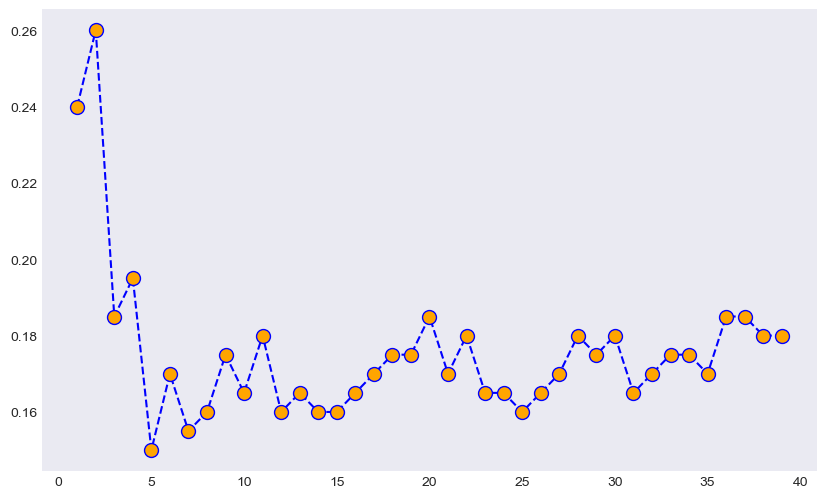

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[81 17]
 [19 83]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        98
           1       0.83      0.81      0.82       102

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

